In [23]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## 선형회귀 (Linear Regression)

먼저, 주어진 데이터를 직선을 사용해 모델링하는 방법을 살펴본다. 직선함수는 다음과 같은 형태를 가진다.
$$
y = ax + b
$$
여기서 $a$는 기울기 (*slope*)이고 $b$는 $y$절편 (*intercept*)라고 불린다.

아래 그래프는 기울기가 2이고 $y$절편이 -5인 직선으로부터 생성된 데이터를 보여준다

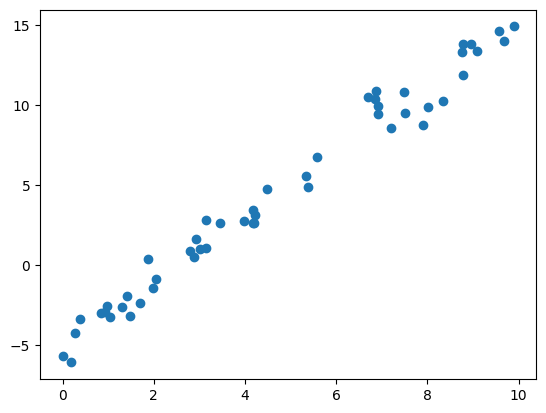

In [24]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

Scikit-Learn의 ``LinearRegression`` estimator를 사용해서 위 데이터를 가장 잘 표현하는 직선을 찾을 수 있다.

In [25]:
x

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
       2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
       4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00,
       8.00744569e+00, 9.68261576e+00, 3.13424178e+00, 6.92322616e+00,
       8.76389152e+00, 8.94606664e+00, 8.50442114e-01, 3.90547832e-01,
       1.69830420e+00, 8.78142503e+00, 9.83468338e-01, 4.21107625e+00,
       9.57889530e+00, 5.33165285e+00, 6.91877114e+00, 3.15515631e+00,
       6.86500928e+00, 8.34625672e+00, 1.82882773e-01, 7.50144315e+00,
       9.88861089e+00, 7.48165654e+00, 2.80443992e+00, 7.89279328e+00,
       1.03226007e+00, 4.47893526e+00, 9.08595503e+00, 2.93614148e+00,
       2.87775339e+00, 1.30028572e+00])

In [26]:
x.shape

(50,)

np.newaxis를 이용하여 col_vec형태로 생성

In [27]:
x[:, np.newaxis].shape

(50, 1)

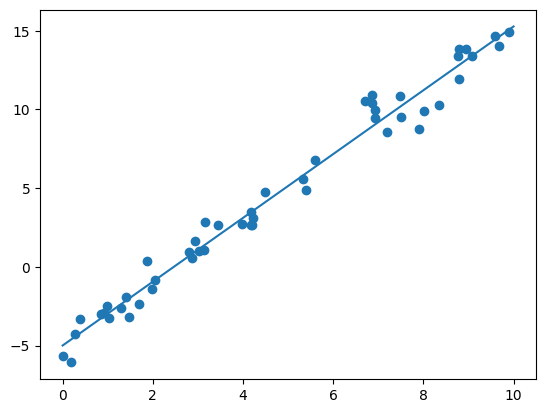

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

모델 학습이 끝난 후 학습된 파라미터들은 model."파라미터이름"_ 의 형태로 저장된다. 기울기와 y절편은 아래와 같이 출력할 수 있다.

In [29]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606944
Model intercept: -4.9985770855532


``LinearRegression`` estimator는 위의 예제와 같은 1차원 입력뿐만 아니라 다차원 입력을 사용한 선형모델을 다룰 수 있다. 다차원 선형모델은 다음과 같은 형태를 가진다.
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
기하학적으로 이것은 hyper-plane으로 데이터를 표현하는 것이라고 말할 수 있다.

In [30]:
rng = np.random.RandomState(1)
rng.rand(100, 3).shape
X = 10 * rng.rand(100, 3)
np.dot(X, [1.5, -2., 1.]).shape

(100,)

In [31]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


$y$값들은 랜덤하게 생성된 3차원의 $x$값과 계수들([1.5, -2., 1.])을 곱함으로써 생성되었는데, linear regression을 통해서 이 계수들을 계산해낼 수 있다는 것을 알 수 있다.

만약 데이터가 선형적인 관계를 가지고 있지 않다면?

## 선형 기저함수 모델 (Linear Basis Function Models)

비선형데이터를 선형함수로 모델링하는 한가지 방법은 기저함수(basis function)을 사용하는 것이다.

예를 들어, 다음과 같은 선형함수를 사용한다고 하자.
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
여기서 $x_1, x_2, x_3,$등을 1차원 $x$로부터 생성할 수 있다($x_n = f_n(x)$). $f_n$을 기저함수(basis function)라고 부른다.

만약 $f_n(x) = x^n$라는 기저함수를 사용하면 최종적인 모델은 다음과 같을 것이다.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

이 모델은 여전히 계수($a_n$)에 관해서는 선형함수임을 기억하자. 따라서 1차원 변수인 $x$를 기저함수를 통해 다차원으로 확장시킴으로써 우리는 여전히 선형모델(linear regression)을 사용할 수 있게 된다.

### 다항 기저함수 (Polynomial Basis Functions)

$f_n(x) = x^n$ 형태의 함수를 다항 기저함수 (polynomial basis functions)라고 부른다. Scikit-Learn은 ``PolynomialFeatures``이라는 transformer를 이미 포함하고 있다.

In [32]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

PolynomialFeatures가 1차원 array를 3차원 array로 변환한 것을 볼 수 있다. 이렇게 변환된 데이터를 선형모델에 적용할 수 있다.

7차원 변환을 적용해보자.

In [33]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

다차원 변환을 사용하면 복잡한 데이터를 모델링할 수 있게 된다. 예를 들어 sin 함수를 사용해서 데이터를 생성하고 모델링해보자.

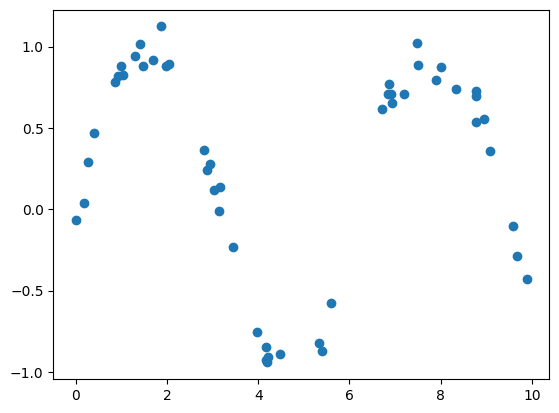

In [34]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
plt.scatter(x, y);

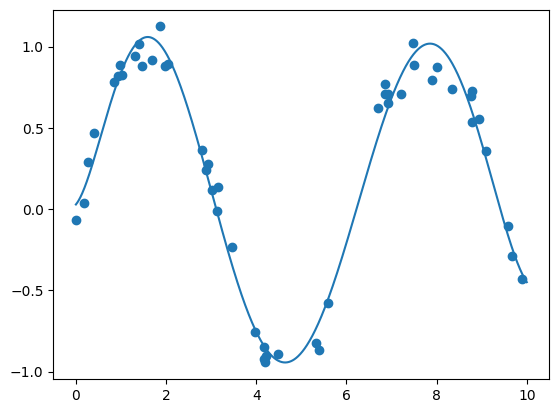

In [35]:
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

### 가우시안 기저함수 (Gaussian Basis Functions)

다항 기저함수 외에 다른 기저함수를 사용해보자. 가우시안 기저함수는 다음과 같이 정의된다.

$$\exp \{-\frac{(x-u_j)^2}{2s^2}\}$$

$u_j$는 함수의 위치, $s$는 폭을 결정한다. 주어진 데이터를 여러 개의 가우시안 기저함수들의 합으로 표현하려고 시도할 수 있다.

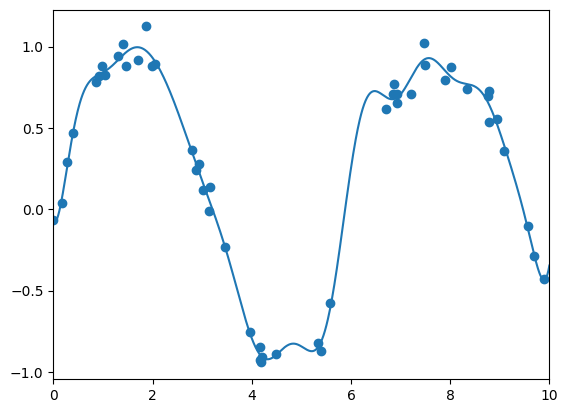

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

## 규제화 (Regularization)

기저함수를 사용함으로써 복잡한 데이터를 모델링할 수 있게 되었지만 over-fitting이라는 다른 심각한 문제를 만날 수 있다.  
예를 들어, 너무 많은 개수의 가우시안 기저함수를 사용하게 되면 다음과 같이 될 수 있다.


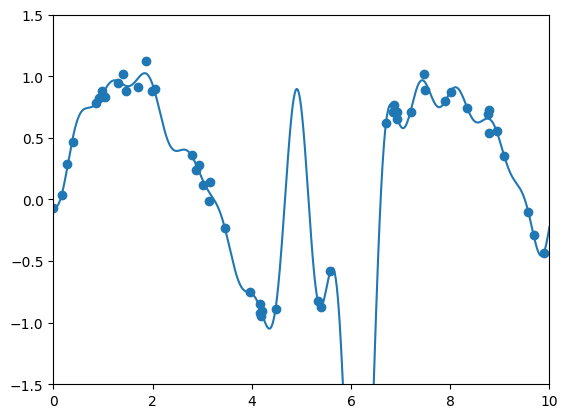

In [45]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

이 예제에서는 30개의 기저함수가 사용되었는데 모델이 필요이상으로 flexible해져서 데이터가 없는 곳에서는 극단적인 값을 가지는 것을 볼 수 있다. 기저함수의 계수들은 다음과 같이 확인할 수 있다.

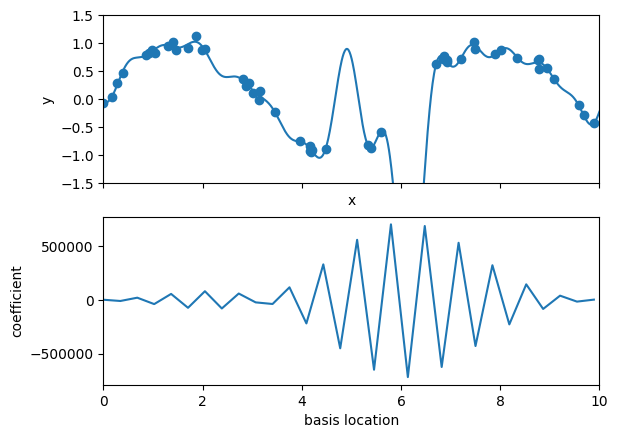

In [46]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

위 두번째 그래프는 각각의 가우시안 기저함수의 크기(계수값)을 보여주고 있다. Over-fitting이 일어나는 영역에서는 인접한 기저함수들의 값이 극단으로 가면서 서로 상쇄하는 현상이 일어난다. 따라서 큰 계수값에 대해 penalty를 부여해서 over-fitting을 어느 정도 극복할 수 있을 것이다. 이러한 penalty를 *regularization*이라 부른다.

## Sklearn Dataset을 이용

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn import metrics

ModuleNotFoundError: No module named 'statsmodels'

In [22]:
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


In [23]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [24]:
housing.data[:, 0:1]

array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7   ],
       [1.8672],
       [2.3886]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(housing.data[:, 0:1],housing.target,random_state=34)

print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(15480, 1) (5160, 1) (15480,) (5160,)


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

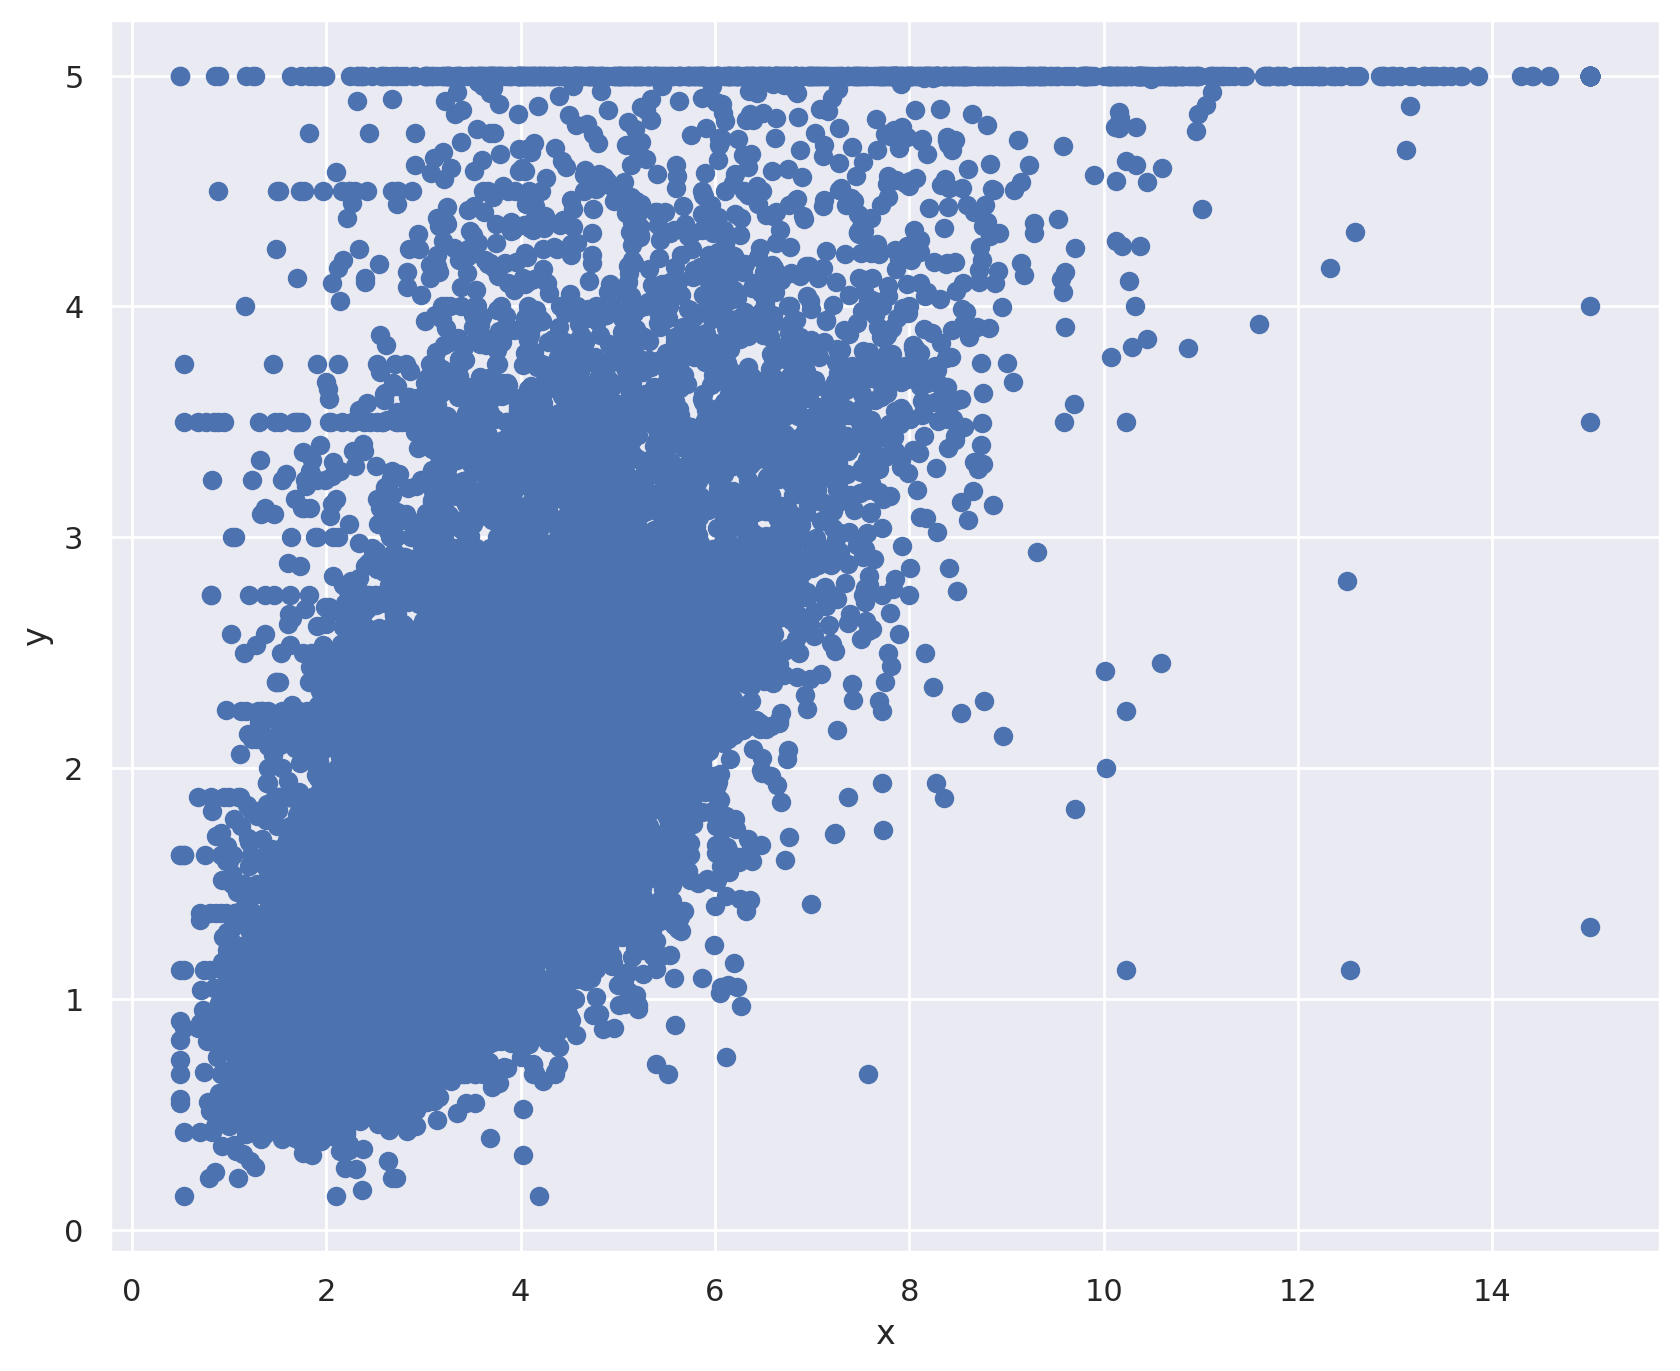

In [26]:
# scatter graph

plt.scatter(X_train, y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [29]:
estimator = LinearRegression()

estimator.fit(X_train, y_train)
print(estimator.score(X_test, y_test))

#함수를 쓰지 않고 계산
y_pred = estimator.predict(X_test)
score = 1 - ((y_test - y_pred)**2).sum() / ((y_test - y_test.mean())**2).sum()
print(score)

y_predict = estimator.predict(X_train)
score = metrics.r2_score(y_train, y_predict)
print(score) #1.0

y_predict = estimator.predict(X_test) 
score = metrics.r2_score(y_test, y_predict)
print(score) #1.0

0.4835343856722052
0.4835343856722052
0.4700194881190284
0.4835343856722052
